<b> Homework 3 </b>

In [47]:
from sklearn.datasets import make_blobs
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier
import os
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import confusion_matrix

In [2]:
X, y = make_blobs(n_samples=2000, centers=3, n_features=3, random_state=42)

In [4]:
X

array([[-8.49915018,  5.66714239,  1.50998292],
       [-9.73649714,  7.58434608,  1.99746757],
       [ 0.77330996, -7.17188241, -6.7270076 ],
       ...,
       [ 0.05507008, -7.02973141, -5.52808112],
       [ 3.4022867 , -7.49457763, -6.55509546],
       [-4.13879061,  9.56614978,  6.64545288]])

In [5]:
y

array([2, 2, 1, ..., 1, 1, 0])

In [6]:
print("X shape: ",X.shape)
print("y shape: ",y.shape)

X shape:  (2000, 3)
y shape:  (2000,)


In [7]:
X_df=pd.DataFrame(X,columns=['X1','X2','X3'])
y_df=pd.DataFrame(y,columns=['Y1'])

In [8]:
X_df.head()

,X1,X2,X3
0,-8.499150,5.667142,1.509983
1,-9.736497,7.584346,1.997468
2,0.773310,-7.171882,-6.727008
3,1.745282,-5.885697,-7.788316
4,1.583768,-5.288722,-7.983133


In [9]:
y_df.head()

,Y1
0,2
1,2
2,1
3,1
4,1


In [10]:
X_df.describe()

,X1,X2,X3
count,2000.000000,2000.000000,2000.000000
mean,-3.185601,3.158252,-0.058714
std,4.552214,7.209014,5.037935
min,-12.420390,-10.351057,-9.712629
25%,-8.239049,-6.206542,-6.163356
50%,-2.522167,7.251697,1.965763
75%,1.275338,8.652427,4.039708
max,4.543077,11.952039,8.012175


In [11]:
y_df.describe()

,Y1
count,2000.000000
mean,0.999500
std,0.816599
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [12]:
X_df.isna().sum()

X1    0
X2    0
X3    0
dtype: int64

In [13]:
y_df.isna().sum()

Y1    0
dtype: int64

In [19]:
df=pd.concat([X_df,y_df],axis=1)
df

,X1,X2,X3,Y1
0,-8.499150,5.667142,1.509983,2
1,-9.736497,7.584346,1.997468,2
2,0.773310,-7.171882,-6.727008,1
3,1.745282,-5.885697,-7.788316,1
4,1.583768,-5.288722,-7.983133,1
...,...,...,...,...
1995,-7.004843,6.572623,-0.021636,2
1996,-10.213553,7.144539,1.863649,2
1997,0.055070,-7.029731,-5.528081,1
1998,3.402287,-7.494578,-6.555095,1


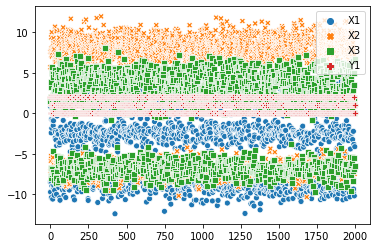

In [20]:
sns.scatterplot(data=df)

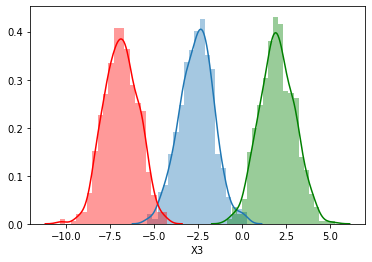

In [21]:
sns.distplot(df[df.Y1==0].X1)
sns.distplot(df[df.Y1==1].X2,color="r")
sns.distplot(df[df.Y1==2].X3,color="g")

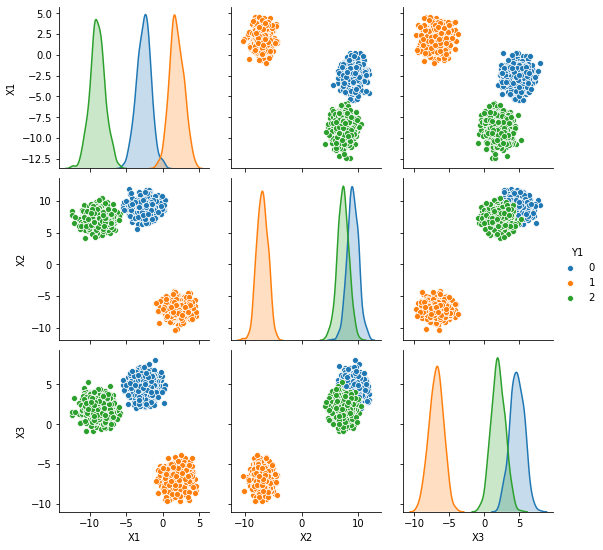

In [23]:
sns.pairplot(df,hue='Y1')

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_df,y_df, test_size=0.3, random_state=42)

In [28]:
df["Y1"].value_counts()

1    667
0    667
2    666
Name: Y1, dtype: int64

<b> With max_depth=1 </b>

In [39]:
clf = DecisionTreeClassifier(max_depth=1, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.6742857142857143
Accuracy of test: 0.65


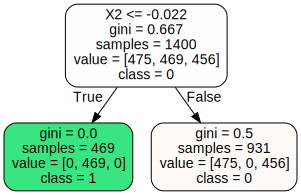

In [40]:
os.environ["PATH"] += ';' + r'E:\Anaconda\Library\bin\graphviz'

dot_data = export_graphviz(clf, out_file=None,
                     feature_names=X_df.columns,
                     class_names=["0","1","2"],
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

<b> With max_depth=2 </b>

In [41]:
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 1.0
Accuracy of test: 1.0


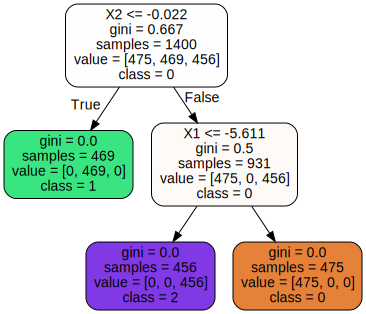

In [42]:
dot_data = export_graphviz(clf, out_file=None,
                     feature_names=X_df.columns,
                     class_names=["0","1","2"],
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [45]:
preds = clf.predict(X_test)
print("Precision = {}".format(precision_score(y_test, preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, preds)))

Precision = 1.0
Recall = 1.0
Accuracy = 1.0


In [48]:
confusion_matrix(y_test, preds)

array([[192,   0,   0],
       [  0, 198,   0],
       [  0,   0, 210]], dtype=int64)

<h2> Xgboost </h2>

In [25]:
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

In [26]:
param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

[21:38:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [27]:
preds = model.predict(dmatrix_test)
preds[:10]

array([[0.9964575 , 0.00177211, 0.00177031],
       [0.00192329, 0.99626285, 0.00181389],
       [0.9964575 , 0.00177211, 0.00177031],
       [0.00192329, 0.99626285, 0.00181389],
       [0.00287783, 0.001805  , 0.9953172 ],
       [0.00192329, 0.99626285, 0.00181389],
       [0.00191378, 0.00180674, 0.9962794 ],
       [0.9964575 , 0.00177211, 0.00177031],
       [0.9964575 , 0.00177211, 0.00177031],
       [0.9964575 , 0.00177211, 0.00177031]], dtype=float32)

In [28]:
best_preds = np.asarray([np.argmax(line) for line in preds])

In [29]:
best_preds

array([0, 1, 0, 1, 2, 1, 2, 0, 0, 0, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0,
       2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 2, 0, 0, 2, 1, 2, 2, 0, 2, 2,
       2, 0, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 0, 1, 0, 2, 1,
       1, 1, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1, 2, 0,
       2, 1, 2, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 1, 2, 1, 2, 0,
       2, 1, 1, 1, 1, 2, 2, 0, 1, 2, 0, 0, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1,
       1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 1, 0, 1, 2, 0,
       2, 2, 2, 2, 0, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 0, 1, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 2, 1, 2, 1, 0, 0, 0, 1, 2, 0, 2,
       1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 1, 0, 2, 2, 2, 0, 2, 1, 2, 1, 0, 0,
       2, 1, 2, 1, 0, 2, 1, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0,
       0, 2, 1, 0, 0, 2, 2, 2, 1, 1, 0, 2, 2, 1, 2,

In [33]:
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 1.0
Recall = 1.0
Accuracy = 1.0


In [37]:
print(classification_report(y_test,best_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       198
           2       1.00      1.00      1.00       210

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [39]:
categories=['X1','X2','X3']

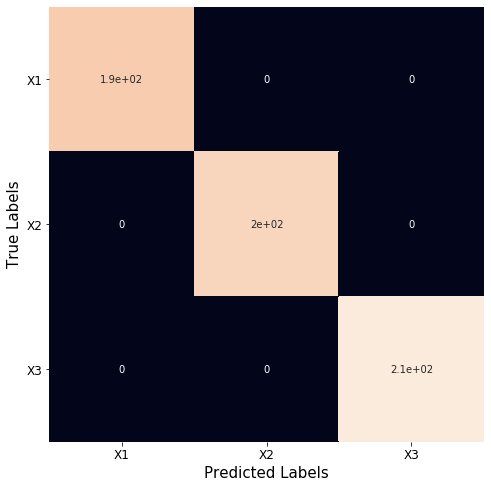

In [40]:
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, best_preds)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [41]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.00001,0.001,0.01,0.1,1,2],
    'n_estimators': [10,190,200,210,500,1000,2000]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27)

clf = GridSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

[21:52:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:52:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Tuned: {'learning_rate': 1e-05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 10}
Mean of the cv scores is 1.000000
Train Score 0.995714
Test Score 0.995000
Seconds used for refitting the best model on the train dataset: 0.058003


E:\Anaconda\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<b>I'm just going to paste the result here because there is a lot of warnings on top.</b>

Tuned: {'learning_rate': 1e-05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 10}

Mean of the cv scores is 1.000000

Train Score 0.995714

Test Score 0.995000

Seconds used for refitting the best model on the train dataset: 0.058003

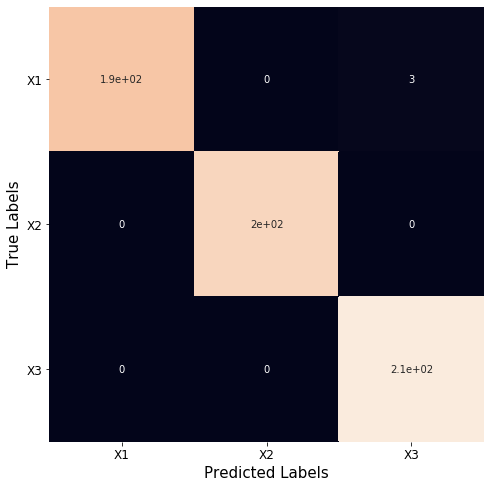

In [42]:
plt.figure(figsize=(12, 8))

xgb_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, xgb_pred)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()